In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

import statsmodels.formula.api as sma


# problem statement--> predict the probability of survival in data

In [2]:
titanic=pd.read_csv(r"C:\Users\hp\Downloads\train\train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Features of Data and its Data type evaluation

In [3]:
s=titanic.shape # shape provides the no of rows and columns

In [4]:
print("rows",s[0])
print("columns", s[1])

rows 891
columns 12


In [5]:
titanic.info() # from info it is clear that there are null values in cabin, Age,Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe().T # from this five point data summary it is conveinient to collect the info about the different 
# features of dataset. we are assuming that there are outliers in Age, sibsp,Parch,Fare column.but 
# for confirmation we have to check that.

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
titanic.select_dtypes(include=np.number).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

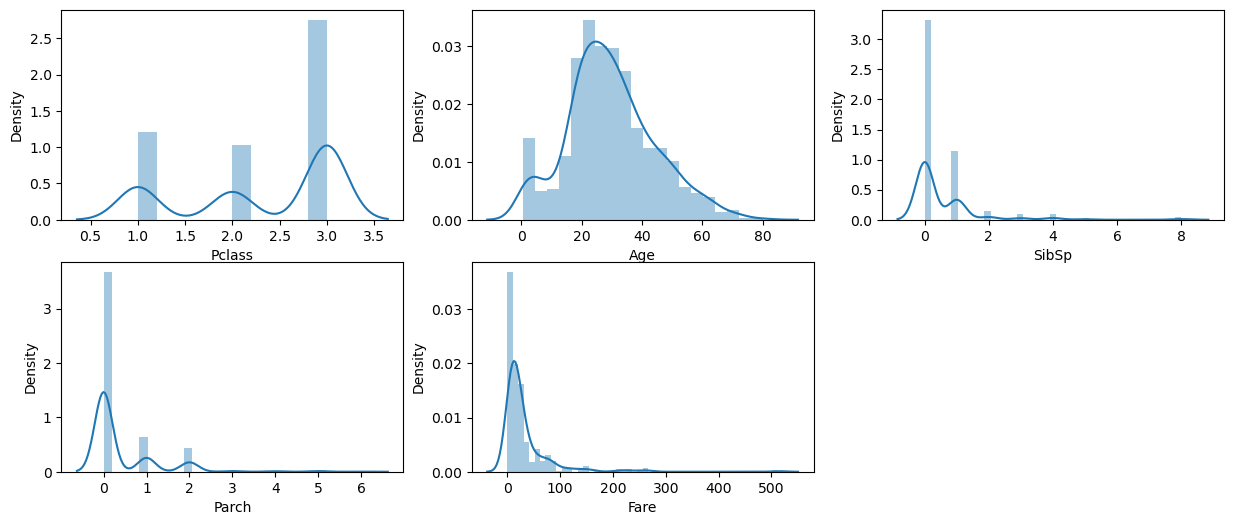

In [8]:
# univariate analysis
plt.rcParams['figure.figsize']=[15,6]
cols=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

a=2
b=3
c=1
for i in cols:
    plt.subplot(a,b,c)
    sns.distplot(titanic.loc[:,i].dropna())
    c=c+1
    plt.title
plt.tight_layout
plt.show()

In [9]:
#  from the distplot  we can infer that Pclass, Sibsp, Parch are categorical variable with 3 levels in each, Fare is a numeric value
# there are 3 variables which are categorical Pclass,Sibsp,Parch which are having 0 with the high frequency

# Missing value Treatment

In [10]:
(titanic.isnull().sum()/s[0])*100 # from the data it is clear that maximum no of null values are in the cabin feature.

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
titanic.groupby(['Pclass', 'Sex'])['Embarked'].value_counts()

Pclass  Sex     Embarked
1       female  S            48
                C            43
                Q             1
        male    S            79
                C            42
                Q             1
2       female  S            67
                C             7
                Q             2
        male    S            97
                C            10
                Q             1
3       female  S            88
                Q            33
                C            23
        male    S           265
                C            43
                Q            39
Name: Embarked, dtype: int64

In [12]:
titanic['Embarked']=np.where(titanic['Embarked'].isnull()==True,"S" ,titanic['Embarked'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

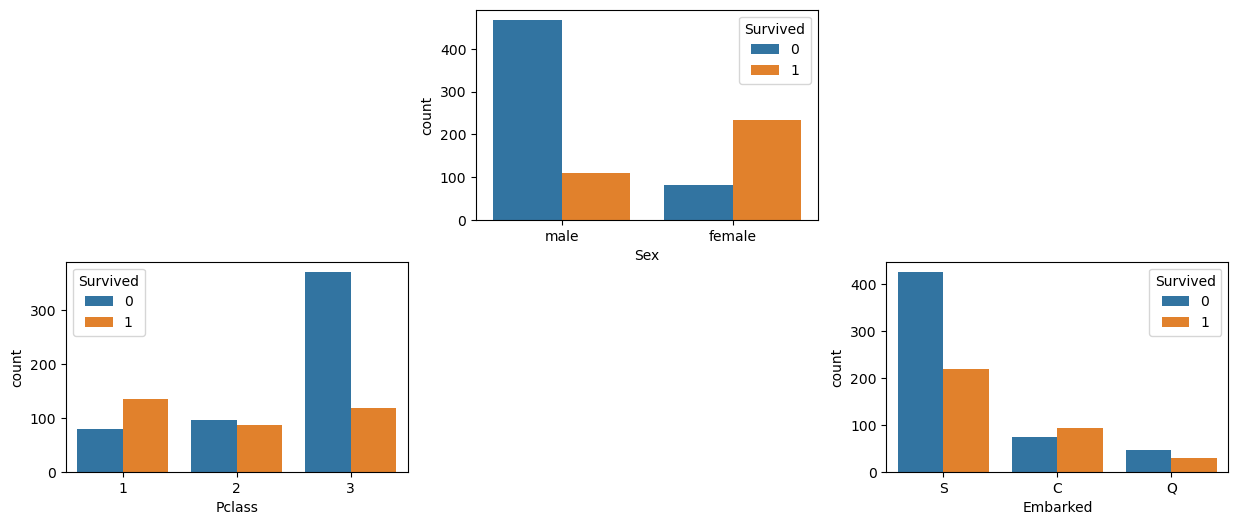

In [13]:
plt.rcParams['figure.figsize']=[15,6]
plt.subplot(2,3,2)
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.subplot(2,3,4)
sns.countplot(x='Pclass',  hue='Survived', data=titanic)
plt.subplot(2,3,6)
sns.countplot(x='Embarked', hue='Survived', data=titanic)



In [14]:
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [15]:
#  From the above graph it is clear Females have higher survival rate than males.
# Pclass 1 have higher survival rate as compare to pclass 2 which  have higher survival rate than pclass 3.
#  Embarked from S has higher survival rate than c which has more survival chances than passengers embarked from Q.

<AxesSubplot:xlabel='Parch', ylabel='count'>

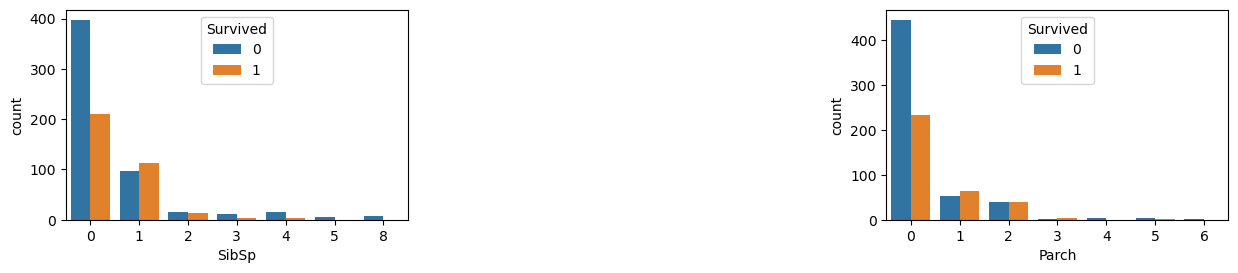

In [16]:
plt.subplot(2,3,4)
sns.countplot(x='SibSp', hue='Survived', data=titanic)

plt.subplot(2,3,6)
sns.countplot(x='Parch', hue='Survived', data=titanic)


In [17]:
pd.crosstab(titanic['Survived'], titanic['SibSp'])

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [18]:
pd.crosstab(titanic['Survived'], titanic['Parch'])

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


In [19]:
print("people who survived with 0 Parch=",233/(455+233))
print("people who survived with 1 Parch=",53/(53+65))
print("people who survived with 2 Parch=",40/80)
print("people who survived with 3 Parch=",3/5)


people who survived with 0 Parch= 0.3386627906976744
people who survived with 1 Parch= 0.4491525423728814
people who survived with 2 Parch= 0.5
people who survived with 3 Parch= 0.6


In [20]:
print("people who survived with 0 sibsp=",210/608)
print("people who survived with 1 sibsp=",112/209)
print("people who survived with 2 sibsp=",15/28)
print("people who survived with 3 sibsp=",4/16)
print("people who survived with 4 sibsp=",3/18)

people who survived with 0 sibsp= 0.34539473684210525
people who survived with 1 sibsp= 0.5358851674641149
people who survived with 2 sibsp= 0.5357142857142857
people who survived with 3 sibsp= 0.25
people who survived with 4 sibsp= 0.16666666666666666


In [21]:
# from these 1st graph, it is clear that people with siblings and 
# spouse group has more chances of survival .
# people with 1,2 sibsp have survival chances than 0 sibsp.
# from the 2 nd graph it is clear that people with parents and children group has more chances of survival than the other.

In [22]:
titanic['SibSp'].unique()          

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

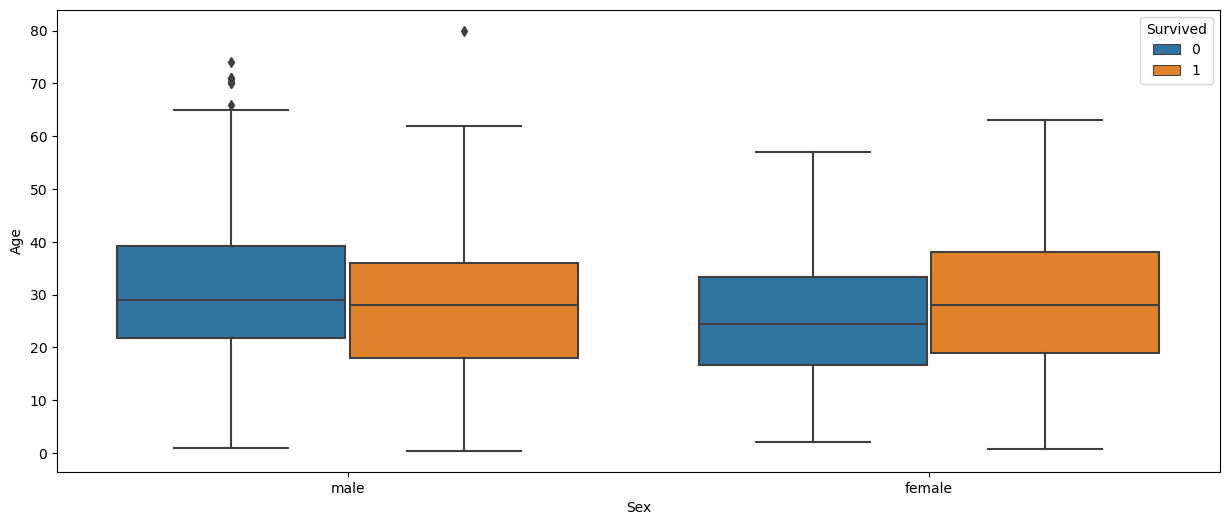

In [23]:
sns.boxplot(x=titanic['Sex'],y= titanic['Age'], hue=titanic["Survived"])

In [24]:
#  From the box plot it is clear that maximum age of female who survived is 72, while in male maximum age of male survived is 80
#  50% of female who survived in are in lying in the age group of 28 yrs, while in males it is aroung 30 yrs.
#  25% of female who survived in are in lying in the age group of 22yrs, while in males it is aroung 20 yrs.
#  75%  of female who survived in are in lying in the age group of 37yrs, while in males it is aroung 36 yrs.

In [25]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
titanic.groupby('Embarked')['Pclass'].value_counts()

Embarked  Pclass
C         1          85
          3          66
          2          17
Q         3          72
          2           3
          1           2
S         3         353
          2         164
          1         129
Name: Pclass, dtype: int64

In [28]:
def count(x):
    if x=="S":
        return('High count')
    elif x=="C":
        return("Medium count")
    else:
        return("low count")

In [29]:
titanic['count']=titanic['Embarked'].apply(count)

In [30]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,High count
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Medium count
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,High count
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,High count
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,High count
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,High count
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,High count
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,High count
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Medium count


In [31]:
titanic.groupby(['Pclass',"Sex"])['Survived'].value_counts(normalize=True)

Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64

In [32]:
titanic['Age'].isnull().sum()

177

In [33]:
list1=[]
for i in titanic['Name']:
    a=i.split(', ')[1].split()[0]
    list1.append(a)
print(list1)    

['Mr.', 'Mrs.', 'Miss.', 'Mrs.', 'Mr.', 'Mr.', 'Mr.', 'Master.', 'Mrs.', 'Mrs.', 'Miss.', 'Miss.', 'Mr.', 'Mr.', 'Miss.', 'Mrs.', 'Master.', 'Mr.', 'Mrs.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Miss.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Don.', 'Mrs.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Miss.', 'Mrs.', 'Mrs.', 'Mr.', 'Miss.', 'Miss.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mrs.', 'Master.', 'Mr.', 'Mrs.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Miss.', 'Master.', 'Mr.', 'Miss.', 'Mr.', 'Master.', 'Mr.', 'Master.', 'Mrs.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Master.', 'Miss.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Miss.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Miss.', 'Mr.', 'Miss.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Master.', 'Mr.', 

In [34]:
titanic['title']=list1

In [35]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,High count,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Medium count,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,High count,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,High count,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,High count,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,High count,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,High count,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,High count,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Medium count,Mr.


In [36]:
titanic.title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [37]:
for i in['Don.', 'Rev.', 'Dr.', 'Mme.', 'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the','Jonkheer.']:
    titanic.replace({i:"others"}, inplace=True)

In [38]:
age= titanic.groupby('title')['Age'].mean().to_dict()
age

{'Master.': 4.574166666666667,
 'Miss.': 21.773972602739725,
 'Mr.': 32.368090452261306,
 'Mrs.': 35.898148148148145,
 'others': 42.38461538461539}

In [39]:
titanic.loc[titanic.Age.isnull()==True,['Age']]=titanic['title'].map(age)
titanic['Age']=np.round(titanic['Age'],2)
titanic.Age.isnull().sum()

0

In [40]:
def age(x):
    if 0<x<=20:
        return('Young')
    elif 20<x<=40:
        return('Middle age')
    elif 40<x<=60:
        return('Senior age')
    else:
        return('old')

In [41]:
titanic['Age_grp']=titanic['Age'].apply(age)

In [42]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count,title,Age_grp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,High count,Mr.,Middle age
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,Medium count,Mrs.,Middle age
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,High count,Miss.,Middle age
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,High count,Mrs.,Middle age
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,High count,Mr.,Middle age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S,High count,others,Middle age
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S,High count,Miss.,Young
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.77,1,2,W./C. 6607,23.4500,NaN,S,High count,Miss.,Middle age
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C,Medium count,Mr.,Middle age


In [43]:
model= sma.ols('Fare~Survived', data=titanic).fit()
import statsmodels.api as sa
sa.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Survived,1.0,1.455089e+05,145508.887663,63.030764,6.120189e-15
Residual,889.0,2.052290e+06,2308.537576,NaN,NaN


In [44]:
count=titanic.groupby(['Sex', 'Age_grp'])['Survived'].value_counts()
count
count2=pd.Series(count)
count2

Sex     Age_grp     Survived
female  Middle age  1           143
                    0            46
        Senior age  1            34
                    0            11
        Young       1            53
                    0            24
        old         1             3
male    Middle age  0           308
                    1            60
        Senior age  0            68
                    1            16
        Young       0            75
                    1            31
        old         0            17
                    1             2
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Age_grp', ylabel='count'>

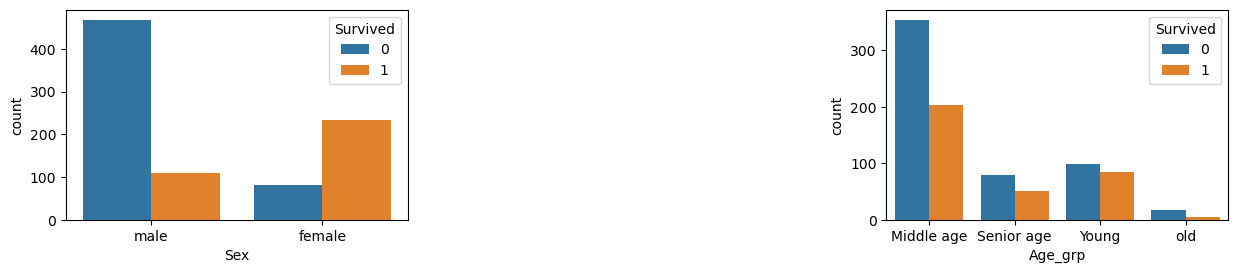

In [45]:
plt.subplot(2,3,4)
sns.countplot(x='Sex', hue='Survived', data=titanic)

plt.subplot(2,3,6)
sns.countplot(x='Age_grp', hue='Survived', data=titanic)



In [46]:
proportion_of_females_who_survived=(143+34+53+3)/891
print("proportion_of_females_who_survived", proportion_of_females_who_survived)
proportion_of_males_who_survived=(60+16+31+2)/891
print("proportion_of_males_who_survived", proportion_of_males_who_survived)

proportion_of_females_who_survived 0.2615039281705948
proportion_of_males_who_survived 0.122334455667789


In [47]:
titanic['Employment']= np.where(titanic.Fare==0.0,'employee','unemployee')

In [48]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count,title,Age_grp,Employment
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,High count,Mr.,Middle age,unemployee
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,Medium count,Mrs.,Middle age,unemployee
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,High count,Miss.,Middle age,unemployee
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,High count,Mrs.,Middle age,unemployee
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,High count,Mr.,Middle age,unemployee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S,High count,others,Middle age,unemployee
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S,High count,Miss.,Young,unemployee
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.77,1,2,W./C. 6607,23.4500,NaN,S,High count,Miss.,Middle age,unemployee
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C,Medium count,Mr.,Middle age,unemployee


<AxesSubplot:xlabel='Employment', ylabel='count'>

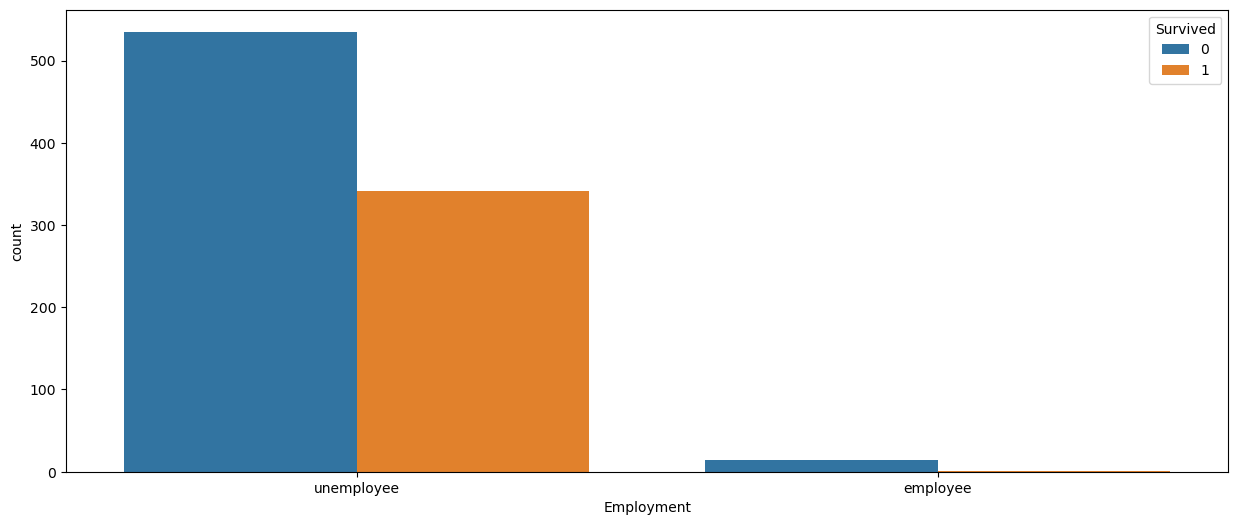

In [49]:
sns.countplot(x= titanic['Employment'], hue='Survived', data=titanic)

In [50]:
pd.crosstab(titanic['Employment'],titanic['Survived'])

Survived,0,1
Employment,,
employee,14,1
unemployee,535,341


In [51]:
val=titanic.groupby("Ticket")["Ticket"].count().to_dict()
val

{'110152': 3,
 '110413': 3,
 '110465': 2,
 '110564': 1,
 '110813': 1,
 '111240': 1,
 '111320': 1,
 '111361': 2,
 '111369': 1,
 '111426': 1,
 '111427': 1,
 '111428': 1,
 '112050': 1,
 '112052': 1,
 '112053': 1,
 '112058': 1,
 '112059': 1,
 '112277': 1,
 '112379': 1,
 '113028': 1,
 '113043': 1,
 '113050': 1,
 '113051': 1,
 '113055': 1,
 '113056': 1,
 '113059': 1,
 '113501': 1,
 '113503': 1,
 '113505': 2,
 '113509': 1,
 '113510': 1,
 '113514': 1,
 '113572': 2,
 '113760': 4,
 '113767': 1,
 '113773': 1,
 '113776': 2,
 '113781': 4,
 '113783': 1,
 '113784': 1,
 '113786': 1,
 '113787': 1,
 '113788': 1,
 '113789': 2,
 '113792': 1,
 '113794': 1,
 '113796': 1,
 '113798': 2,
 '113800': 1,
 '113803': 2,
 '113804': 1,
 '113806': 2,
 '113807': 1,
 '11668': 2,
 '11751': 2,
 '11752': 1,
 '11753': 1,
 '11755': 1,
 '11765': 1,
 '11767': 2,
 '11769': 1,
 '11771': 1,
 '11774': 1,
 '11813': 1,
 '11967': 2,
 '12233': 1,
 '12460': 1,
 '12749': 2,
 '13049': 1,
 '13213': 1,
 '13214': 1,
 '13502': 3,
 '13507': 2

In [52]:
titanic.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [53]:
titanic ['fmly_onboard']=titanic['Ticket'].map(val)

In [54]:
titanic.rename(columns={'fmly_onboard': 'fmly_members'}, inplace=True)

In [55]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count,title,Age_grp,Employment,fmly_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,High count,Mr.,Middle age,unemployee,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,Medium count,Mrs.,Middle age,unemployee,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,High count,Miss.,Middle age,unemployee,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,High count,Mrs.,Middle age,unemployee,2
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,High count,Mr.,Middle age,unemployee,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S,High count,others,Middle age,unemployee,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S,High count,Miss.,Young,unemployee,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.77,1,2,W./C. 6607,23.4500,NaN,S,High count,Miss.,Middle age,unemployee,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C,Medium count,Mr.,Middle age,unemployee,1


<AxesSubplot:xlabel='fmly_members', ylabel='count'>

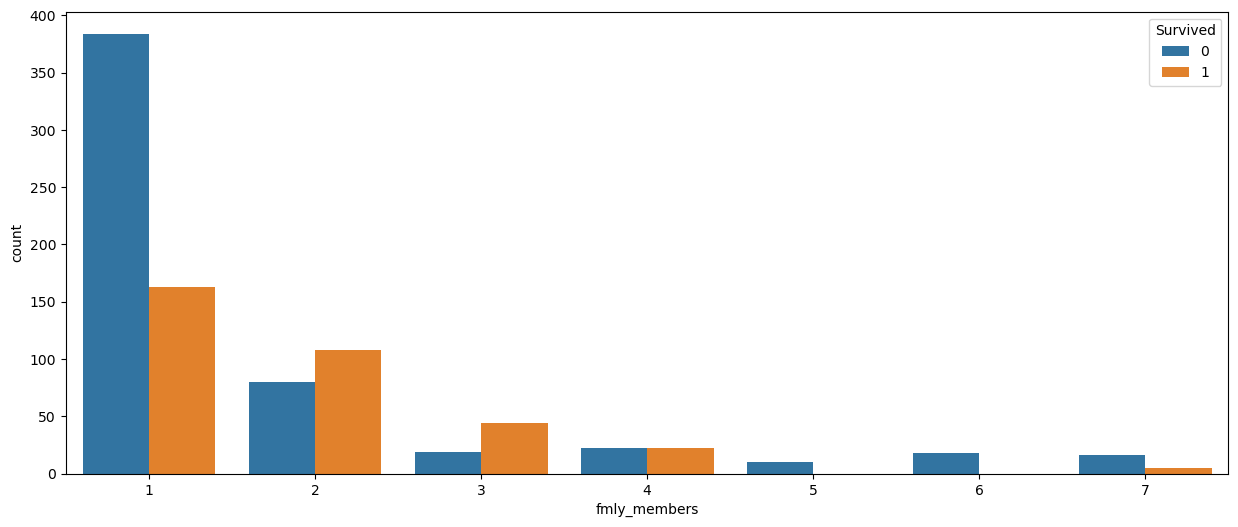

In [56]:
sns.countplot(x=titanic['fmly_members'], hue='Survived', data=titanic)

In [57]:
titanic.groupby('Cabin')['fmly_members'].count()

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Name: fmly_members, Length: 147, dtype: int64

<AxesSubplot:>

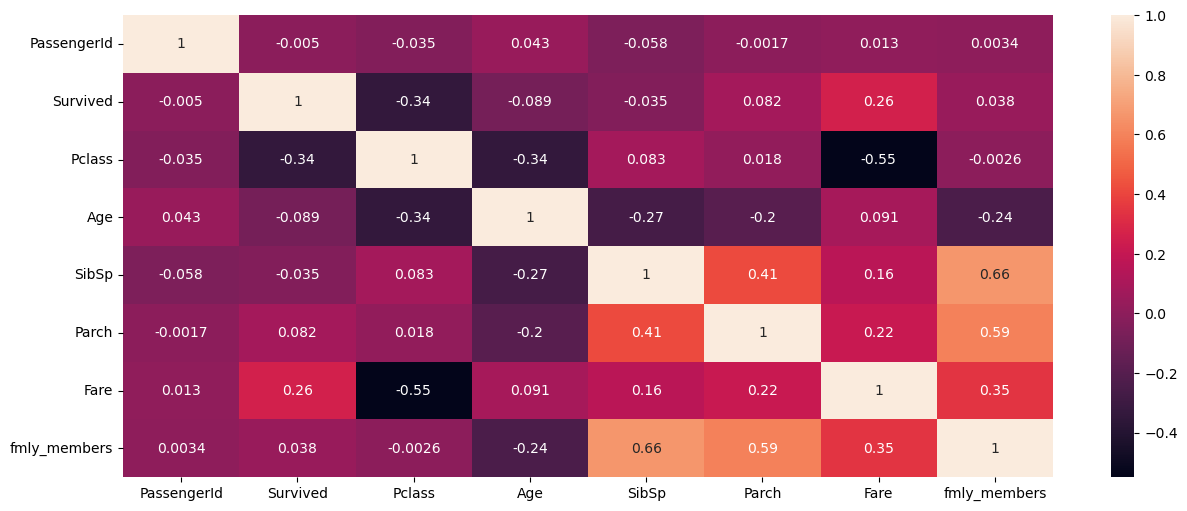

In [58]:
sns.heatmap(titanic.corr(), annot= True)

In [59]:
titanic.drop(columns= ["PassengerId", "Name",'Ticket','Cabin'], inplace=True)

In [60]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,count,title,Age_grp,Employment,fmly_members
0,0,3,male,22.00,1,0,7.2500,S,High count,Mr.,Middle age,unemployee,1
1,1,1,female,38.00,1,0,71.2833,C,Medium count,Mrs.,Middle age,unemployee,1
2,1,3,female,26.00,0,0,7.9250,S,High count,Miss.,Middle age,unemployee,1
3,1,1,female,35.00,1,0,53.1000,S,High count,Mrs.,Middle age,unemployee,2
4,0,3,male,35.00,0,0,8.0500,S,High count,Mr.,Middle age,unemployee,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S,High count,others,Middle age,unemployee,1
887,1,1,female,19.00,0,0,30.0000,S,High count,Miss.,Young,unemployee,1
888,0,3,female,21.77,1,2,23.4500,S,High count,Miss.,Middle age,unemployee,2
889,1,1,male,26.00,0,0,30.0000,C,Medium count,Mr.,Middle age,unemployee,1


In [61]:
titanic['group_members'] = titanic ['fmly_members'] 

In [62]:
pd.crosstab(titanic['Survived'],titanic['Fare']).T

Survived,0,1
Fare,,
0.0000,14,1
4.0125,1,0
5.0000,1,0
6.2375,1,0
6.4375,1,0
...,...,...
227.5250,1,3
247.5208,1,1
262.3750,0,2


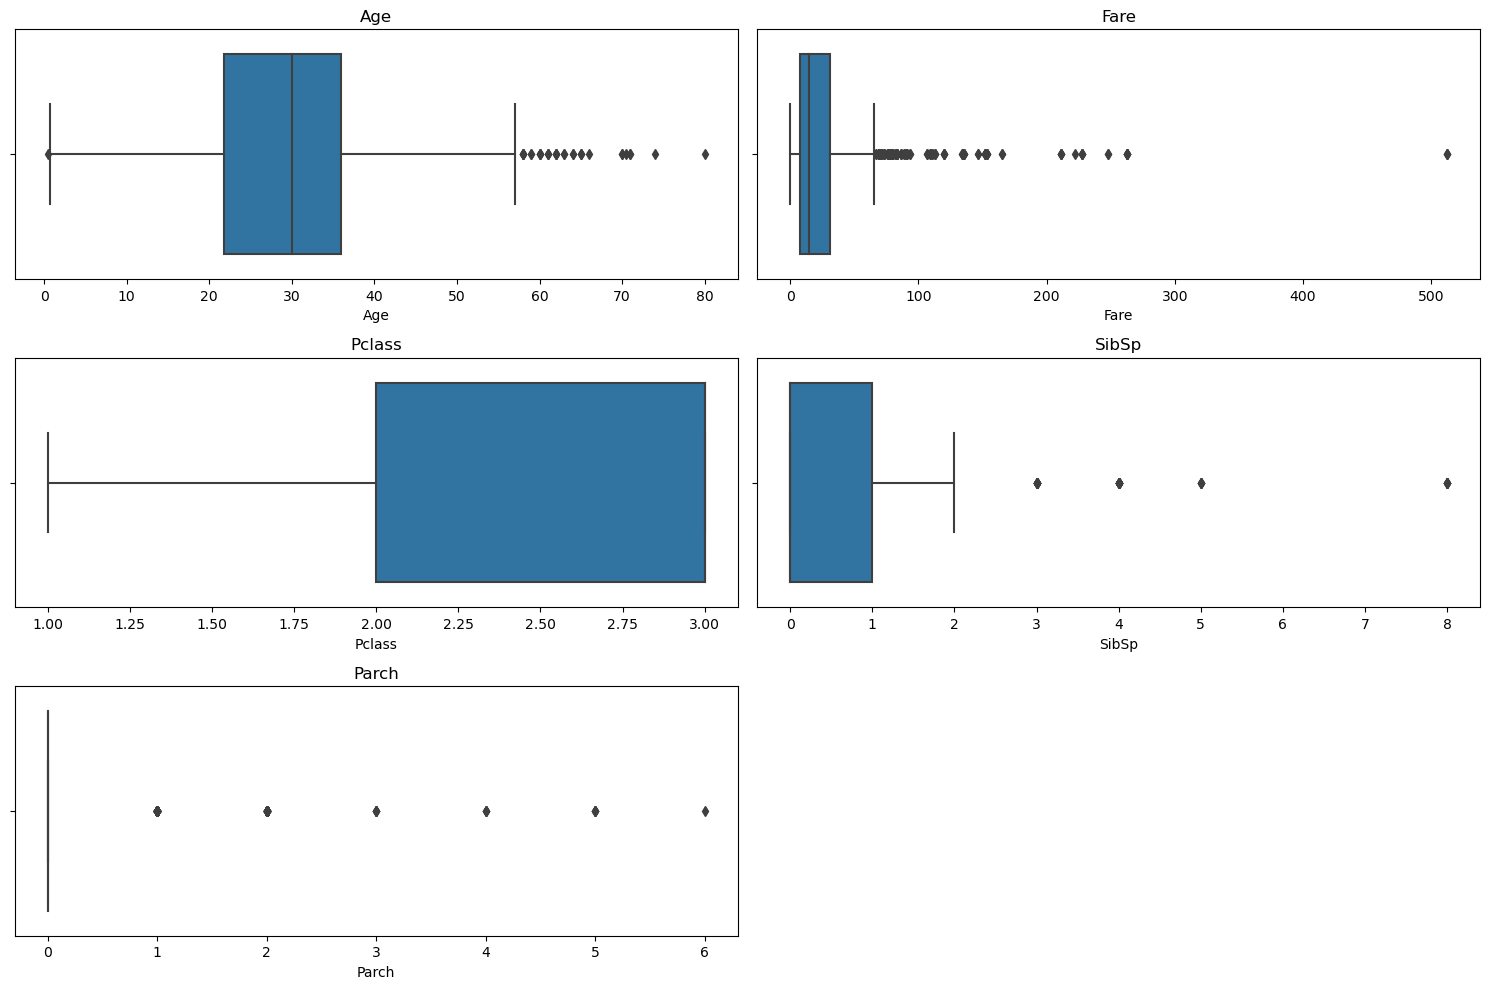

In [63]:
plt.rcParams['figure.figsize']=[15,10]
a=3
b=2
c=1
for i in ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']:
    plt.subplot(a,b,c)
    sns.boxplot(x=titanic[i])
    c=c+1
    plt.title(i)
plt.tight_layout()
    

In [64]:
# From the data it is cler that there are outliers in Pclass, sibsp etc.

In [65]:
mean=titanic.groupby('Pclass')['Fare'].median()
mean

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

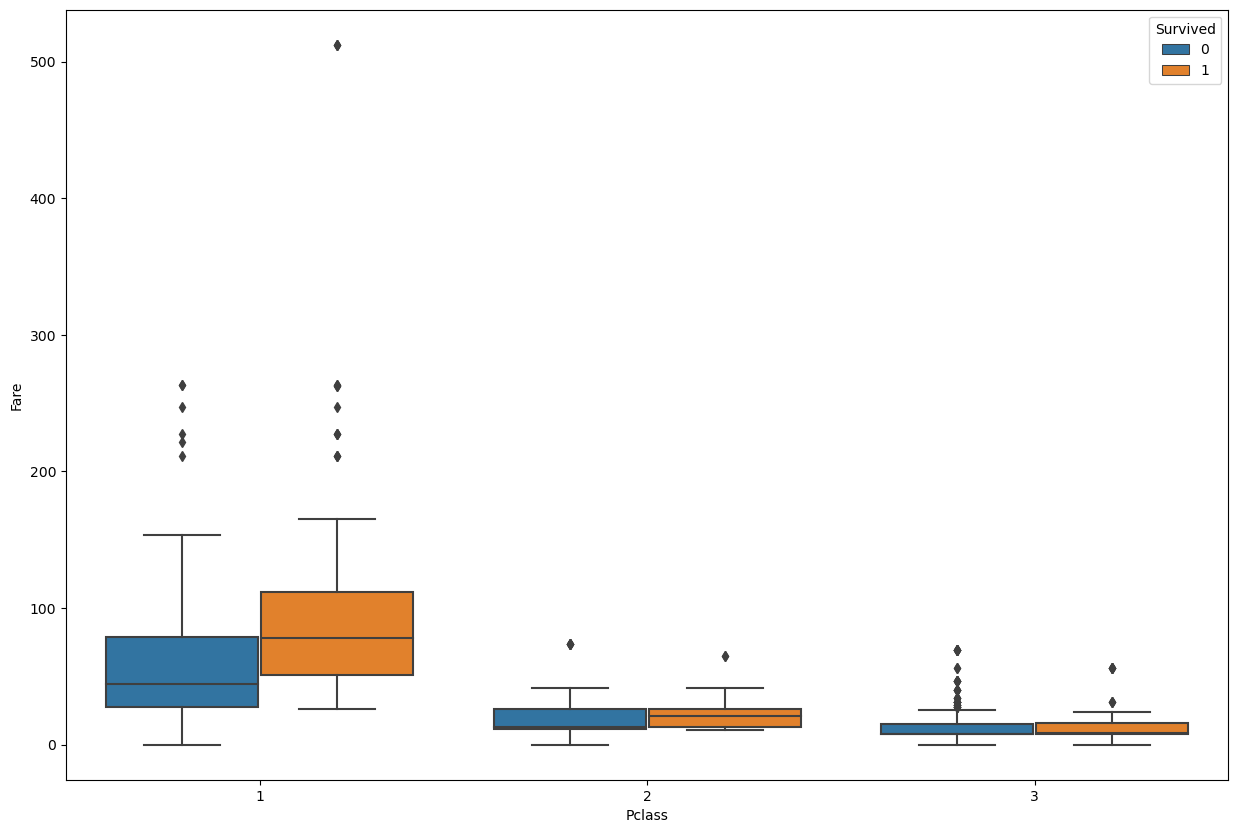

In [66]:
sns.boxplot(x=titanic['Pclass'],y= titanic['Fare'], hue=titanic["Survived"])

In [67]:
#  from the  above data it is clear that Passenger paying high fare travelling in Pclass 1 are having higher survival probability 
# as compare to pclass 2, pclass 3

In [68]:
titanic.groupby('Pclass')['fmly_members'].value_counts()

Pclass  fmly_members
1       1                97
        2                72
        3                27
        4                20
2       1               107
        2                48
        3                24
        5                 5
3       1               343
        2                68
        4                24
        7                21
        6                18
        3                12
        5                 5
Name: fmly_members, dtype: int64

In [69]:
titanic['fmly_members'].replace(1,0,inplace=True)

In [70]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,count,title,Age_grp,Employment,fmly_members,group_members
0,0,3,male,22.00,1,0,7.2500,S,High count,Mr.,Middle age,unemployee,0,1
1,1,1,female,38.00,1,0,71.2833,C,Medium count,Mrs.,Middle age,unemployee,0,1
2,1,3,female,26.00,0,0,7.9250,S,High count,Miss.,Middle age,unemployee,0,1
3,1,1,female,35.00,1,0,53.1000,S,High count,Mrs.,Middle age,unemployee,2,2
4,0,3,male,35.00,0,0,8.0500,S,High count,Mr.,Middle age,unemployee,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S,High count,others,Middle age,unemployee,0,1
887,1,1,female,19.00,0,0,30.0000,S,High count,Miss.,Young,unemployee,0,1
888,0,3,female,21.77,1,2,23.4500,S,High count,Miss.,Middle age,unemployee,2,2
889,1,1,male,26.00,0,0,30.0000,C,Medium count,Mr.,Middle age,unemployee,0,1


In [71]:
titanic['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [72]:
titanic['Age'].max()

80.0

In [73]:
mean=titanic.groupby('Pclass')['Fare'].mean()
mean2=np.round(mean,2)
mean3=mean2.to_dict()
mean3

{1: 84.15, 2: 20.66, 3: 13.68}

In [74]:
pd.crosstab(titanic.Pclass,titanic.Fare)

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Pclass,,,,,,,,,,,,,,,,,,,,,
1,5,0,1,0,0,0,0,0,0,0,...,3,2,3,1,1,4,2,2,4,3
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,1,1,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [75]:
titanic['Fare_range']=titanic['Pclass'].map(mean3)

In [76]:
titanic.select_dtypes(include=np.number)
sca_data=['Age', 'Fare']
c=1
for i in sca_data:
    titanic[i]=stats.yeojohnson(titanic[i])[0]
    c+=1

In [77]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,count,title,Age_grp,Employment,fmly_members,group_members,Fare_range
0,0,3,male,14.943642,1,0,1.906724,S,High count,Mr.,Middle age,unemployee,0,1,13.68
1,1,1,female,23.783505,1,0,3.497640,C,Medium count,Mrs.,Middle age,unemployee,0,1,84.15
2,1,3,female,17.232826,0,0,1.970459,S,High count,Miss.,Middle age,unemployee,0,1,13.68
3,1,1,female,22.183475,1,0,3.304258,S,High count,Mrs.,Middle age,unemployee,2,2,84.15
4,0,3,male,22.183475,0,0,1.981680,S,High count,Mr.,Middle age,unemployee,0,1,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,17.795623,0,0,2.326029,S,High count,others,Middle age,unemployee,0,1,20.66
887,1,1,female,13.181339,0,0,2.916885,S,High count,Miss.,Young,unemployee,0,1,84.15
888,0,3,female,14.810009,1,2,2.745246,S,High count,Miss.,Middle age,unemployee,2,2,13.68
889,1,1,male,17.232826,0,0,2.916885,C,Medium count,Mr.,Middle age,unemployee,0,1,84.15


In [78]:
# Ecoding
titanic['Fare_range']=np.where(titanic['Fare_range']==13.68,0,titanic['Fare_range'])
titanic['Fare_range']=np.where(titanic['Fare_range']==20.66,1,titanic['Fare_range'])
titanic['Fare_range']=np.where(titanic['Fare_range']==84.15,2,titanic['Fare_range'])


In [79]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,count,title,Age_grp,Employment,fmly_members,group_members,Fare_range
0,0,3,male,14.943642,1,0,1.906724,S,High count,Mr.,Middle age,unemployee,0,1,0.0
1,1,1,female,23.783505,1,0,3.497640,C,Medium count,Mrs.,Middle age,unemployee,0,1,2.0
2,1,3,female,17.232826,0,0,1.970459,S,High count,Miss.,Middle age,unemployee,0,1,0.0
3,1,1,female,22.183475,1,0,3.304258,S,High count,Mrs.,Middle age,unemployee,2,2,2.0
4,0,3,male,22.183475,0,0,1.981680,S,High count,Mr.,Middle age,unemployee,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,17.795623,0,0,2.326029,S,High count,others,Middle age,unemployee,0,1,1.0
887,1,1,female,13.181339,0,0,2.916885,S,High count,Miss.,Young,unemployee,0,1,2.0
888,0,3,female,14.810009,1,2,2.745246,S,High count,Miss.,Middle age,unemployee,2,2,0.0
889,1,1,male,17.232826,0,0,2.916885,C,Medium count,Mr.,Middle age,unemployee,0,1,2.0


In [80]:
titanic['fmly_members'].unique()

array([0, 2, 4, 3, 7, 5, 6], dtype=int64)

In [81]:
titanic['fmly_member_includig_that person']=titanic['fmly_members']

In [82]:
titanic['fmly_member_includig_that person'].replace(0,1, inplace=True)

In [83]:
titanic.drop('fmly_members', axis=1, inplace=True)

In [84]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,count,title,Age_grp,Employment,group_members,Fare_range,fmly_member_includig_that person
0,0,3,male,14.943642,1,0,1.906724,S,High count,Mr.,Middle age,unemployee,1,0.0,1
1,1,1,female,23.783505,1,0,3.497640,C,Medium count,Mrs.,Middle age,unemployee,1,2.0,1
2,1,3,female,17.232826,0,0,1.970459,S,High count,Miss.,Middle age,unemployee,1,0.0,1
3,1,1,female,22.183475,1,0,3.304258,S,High count,Mrs.,Middle age,unemployee,2,2.0,2
4,0,3,male,22.183475,0,0,1.981680,S,High count,Mr.,Middle age,unemployee,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,17.795623,0,0,2.326029,S,High count,others,Middle age,unemployee,1,1.0,1
887,1,1,female,13.181339,0,0,2.916885,S,High count,Miss.,Young,unemployee,1,2.0,1
888,0,3,female,14.810009,1,2,2.745246,S,High count,Miss.,Middle age,unemployee,2,0.0,2
889,1,1,male,17.232826,0,0,2.916885,C,Medium count,Mr.,Middle age,unemployee,1,2.0,1


In [85]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,count,title,Age_grp,Employment,group_members,Fare_range,fmly_member_includig_that person
0,0,3,male,14.943642,1,0,1.906724,S,High count,Mr.,Middle age,unemployee,1,0.0,1
1,1,1,female,23.783505,1,0,3.497640,C,Medium count,Mrs.,Middle age,unemployee,1,2.0,1
2,1,3,female,17.232826,0,0,1.970459,S,High count,Miss.,Middle age,unemployee,1,0.0,1
3,1,1,female,22.183475,1,0,3.304258,S,High count,Mrs.,Middle age,unemployee,2,2.0,2
4,0,3,male,22.183475,0,0,1.981680,S,High count,Mr.,Middle age,unemployee,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,17.795623,0,0,2.326029,S,High count,others,Middle age,unemployee,1,1.0,1
887,1,1,female,13.181339,0,0,2.916885,S,High count,Miss.,Young,unemployee,1,2.0,1
888,0,3,female,14.810009,1,2,2.745246,S,High count,Miss.,Middle age,unemployee,2,0.0,2
889,1,1,male,17.232826,0,0,2.916885,C,Medium count,Mr.,Middle age,unemployee,1,2.0,1


In [86]:
titanic.drop('fmly_member_includig_that person', axis=1,inplace=True)

In [87]:
titanic.drop('Fare_range', axis=1,inplace=True)

In [88]:
titanic.drop(['SibSp', 'Parch'], axis=1,inplace=True)

In [89]:
titanic



,Survived,Pclass,Sex,Age,Fare,Embarked,count,title,Age_grp,Employment,group_members
0,0,3,male,14.943642,1.906724,S,High count,Mr.,Middle age,unemployee,1
1,1,1,female,23.783505,3.497640,C,Medium count,Mrs.,Middle age,unemployee,1
2,1,3,female,17.232826,1.970459,S,High count,Miss.,Middle age,unemployee,1
3,1,1,female,22.183475,3.304258,S,High count,Mrs.,Middle age,unemployee,2
4,0,3,male,22.183475,1.981680,S,High count,Mr.,Middle age,unemployee,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,17.795623,2.326029,S,High count,others,Middle age,unemployee,1
887,1,1,female,13.181339,2.916885,S,High count,Miss.,Young,unemployee,1
888,0,3,female,14.810009,2.745246,S,High count,Miss.,Middle age,unemployee,2
889,1,1,male,17.232826,2.916885,C,Medium count,Mr.,Middle age,unemployee,1


In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
sc=StandardScaler()

In [92]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'count',
       'title', 'Age_grp', 'Employment', 'group_members'],
      dtype='object')

In [93]:
titanic.loc[:,['Age', 'Fare']]=sc.fit_transform(pd.DataFrame(titanic.loc[:,['Age', 'Fare']]))

In [94]:
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,count,title,Age_grp,Employment,group_members
0,0,3,male,-0.547553,-0.878820,S,High count,Mr.,Middle age,unemployee,1
1,1,1,female,0.639794,1.336651,C,Medium count,Mrs.,Middle age,unemployee,1
2,1,3,female,-0.240076,-0.790065,S,High count,Miss.,Middle age,unemployee,1
3,1,1,female,0.424883,1.067352,S,High count,Mrs.,Middle age,unemployee,2
4,0,3,male,0.424883,-0.774439,S,High count,Mr.,Middle age,unemployee,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,-0.164482,-0.294907,S,High count,others,Middle age,unemployee,1
887,1,1,female,-0.784261,0.527906,S,High count,Miss.,Young,unemployee,1
888,0,3,female,-0.565502,0.288885,S,High count,Miss.,Middle age,unemployee,2
889,1,1,male,-0.240076,0.527906,C,Medium count,Mr.,Middle age,unemployee,1


In [95]:
titanic.drop('count', axis=1, inplace=True)

In [96]:
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,title,Age_grp,Employment,group_members
0,0,3,male,-0.547553,-0.878820,S,Mr.,Middle age,unemployee,1
1,1,1,female,0.639794,1.336651,C,Mrs.,Middle age,unemployee,1
2,1,3,female,-0.240076,-0.790065,S,Miss.,Middle age,unemployee,1
3,1,1,female,0.424883,1.067352,S,Mrs.,Middle age,unemployee,2
4,0,3,male,0.424883,-0.774439,S,Mr.,Middle age,unemployee,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,-0.164482,-0.294907,S,others,Middle age,unemployee,1
887,1,1,female,-0.784261,0.527906,S,Miss.,Young,unemployee,1
888,0,3,female,-0.565502,0.288885,S,Miss.,Middle age,unemployee,2
889,1,1,male,-0.240076,0.527906,C,Mr.,Middle age,unemployee,1


In [97]:
#  label encoding

In [98]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'title',
       'Age_grp', 'Employment', 'group_members'],
      dtype='object')

In [99]:
titanic.loc[titanic['Sex']=='male','Sex']=0
titanic.loc[titanic['Sex']=='female','Sex']=1 # male is labelled as 0  and female is labelled as 1

In [100]:
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,title,Age_grp,Employment,group_members
0,0,3,0,-0.547553,-0.878820,S,Mr.,Middle age,unemployee,1
1,1,1,1,0.639794,1.336651,C,Mrs.,Middle age,unemployee,1
2,1,3,1,-0.240076,-0.790065,S,Miss.,Middle age,unemployee,1
3,1,1,1,0.424883,1.067352,S,Mrs.,Middle age,unemployee,2
4,0,3,0,0.424883,-0.774439,S,Mr.,Middle age,unemployee,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,-0.164482,-0.294907,S,others,Middle age,unemployee,1
887,1,1,1,-0.784261,0.527906,S,Miss.,Young,unemployee,1
888,0,3,1,-0.565502,0.288885,S,Miss.,Middle age,unemployee,2
889,1,1,0,-0.240076,0.527906,C,Mr.,Middle age,unemployee,1


In [101]:
titanic['Employment']=pd.get_dummies(titanic['Employment'], drop_first=True)

In [102]:
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,title,Age_grp,Employment,group_members
0,0,3,0,-0.547553,-0.878820,S,Mr.,Middle age,1,1
1,1,1,1,0.639794,1.336651,C,Mrs.,Middle age,1,1
2,1,3,1,-0.240076,-0.790065,S,Miss.,Middle age,1,1
3,1,1,1,0.424883,1.067352,S,Mrs.,Middle age,1,2
4,0,3,0,0.424883,-0.774439,S,Mr.,Middle age,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,-0.164482,-0.294907,S,others,Middle age,1,1
887,1,1,1,-0.784261,0.527906,S,Miss.,Young,1,1
888,0,3,1,-0.565502,0.288885,S,Miss.,Middle age,1,2
889,1,1,0,-0.240076,0.527906,C,Mr.,Middle age,1,1


In [103]:
# ordinal encoding in count columns as high count has more survival chanced and low count has least survival count

In [104]:
# titanic.loc[titanic['count']=='High count','count']=3
# titanic.loc[titanic['count']=='Medium count','count']=2
# titanic.loc[titanic['count']=='low count','count']=1

In [105]:
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,title,Age_grp,Employment,group_members
0,0,3,0,-0.547553,-0.878820,S,Mr.,Middle age,1,1
1,1,1,1,0.639794,1.336651,C,Mrs.,Middle age,1,1
2,1,3,1,-0.240076,-0.790065,S,Miss.,Middle age,1,1
3,1,1,1,0.424883,1.067352,S,Mrs.,Middle age,1,2
4,0,3,0,0.424883,-0.774439,S,Mr.,Middle age,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,-0.164482,-0.294907,S,others,Middle age,1,1
887,1,1,1,-0.784261,0.527906,S,Miss.,Young,1,1
888,0,3,1,-0.565502,0.288885,S,Miss.,Middle age,1,2
889,1,1,0,-0.240076,0.527906,C,Mr.,Middle age,1,1


In [106]:
# Frequency encoding in title and age_group

In [107]:
titanic['title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'others'], dtype=object)

In [108]:
titanic['Age_grp'].unique()

array(['Middle age', 'Senior age', 'Young', 'old'], dtype=object)

In [109]:
val=titanic['title'].value_counts(normalize=True)

In [110]:
titanic['title']=titanic['title'].map(val)

In [111]:
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,title,Age_grp,Employment,group_members
0,0,3,0,-0.547553,-0.878820,S,0.580247,Middle age,1,1
1,1,1,1,0.639794,1.336651,C,0.140292,Middle age,1,1
2,1,3,1,-0.240076,-0.790065,S,0.204265,Middle age,1,1
3,1,1,1,0.424883,1.067352,S,0.140292,Middle age,1,2
4,0,3,0,0.424883,-0.774439,S,0.580247,Middle age,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,-0.164482,-0.294907,S,0.030303,Middle age,1,1
887,1,1,1,-0.784261,0.527906,S,0.204265,Young,1,1
888,0,3,1,-0.565502,0.288885,S,0.204265,Middle age,1,2
889,1,1,0,-0.240076,0.527906,C,0.580247,Middle age,1,1


In [112]:
val_age=titanic['Age_grp'].value_counts(normalize=True)

In [113]:
titanic['Age_grp']=titanic['Age_grp'].map(val_age)

In [114]:
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,title,Age_grp,Employment,group_members
0,0,3,0,-0.547553,-0.878820,S,0.580247,0.625140,1,1
1,1,1,1,0.639794,1.336651,C,0.140292,0.625140,1,1
2,1,3,1,-0.240076,-0.790065,S,0.204265,0.625140,1,1
3,1,1,1,0.424883,1.067352,S,0.140292,0.625140,1,2
4,0,3,0,0.424883,-0.774439,S,0.580247,0.625140,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,-0.164482,-0.294907,S,0.030303,0.625140,1,1
887,1,1,1,-0.784261,0.527906,S,0.204265,0.205387,1,1
888,0,3,1,-0.565502,0.288885,S,0.204265,0.625140,1,2
889,1,1,0,-0.240076,0.527906,C,0.580247,0.625140,1,1


In [115]:
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,title,Age_grp,Employment,group_members
0,0,3,0,-0.547553,-0.878820,S,0.580247,0.625140,1,1
1,1,1,1,0.639794,1.336651,C,0.140292,0.625140,1,1
2,1,3,1,-0.240076,-0.790065,S,0.204265,0.625140,1,1
3,1,1,1,0.424883,1.067352,S,0.140292,0.625140,1,2
4,0,3,0,0.424883,-0.774439,S,0.580247,0.625140,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,-0.164482,-0.294907,S,0.030303,0.625140,1,1
887,1,1,1,-0.784261,0.527906,S,0.204265,0.205387,1,1
888,0,3,1,-0.565502,0.288885,S,0.204265,0.625140,1,2
889,1,1,0,-0.240076,0.527906,C,0.580247,0.625140,1,1


In [116]:
dummy=pd.get_dummies(titanic,columns=['Embarked'], drop_first=True)

In [117]:
dummy

,Survived,Pclass,Sex,Age,Fare,title,Age_grp,Employment,group_members,Embarked_Q,Embarked_S
0,0,3,0,-0.547553,-0.878820,0.580247,0.625140,1,1,0,1
1,1,1,1,0.639794,1.336651,0.140292,0.625140,1,1,0,0
2,1,3,1,-0.240076,-0.790065,0.204265,0.625140,1,1,0,1
3,1,1,1,0.424883,1.067352,0.140292,0.625140,1,2,0,1
4,0,3,0,0.424883,-0.774439,0.580247,0.625140,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,-0.164482,-0.294907,0.030303,0.625140,1,1,0,1
887,1,1,1,-0.784261,0.527906,0.204265,0.205387,1,1,0,1
888,0,3,1,-0.565502,0.288885,0.204265,0.625140,1,2,0,1
889,1,1,0,-0.240076,0.527906,0.580247,0.625140,1,1,0,0


In [118]:
x=dummy.drop(['Survived','Age_grp','title'],axis=1)
y=titanic['Survived']

In [119]:
x

,Pclass,Sex,Age,Fare,Employment,group_members,Embarked_Q,Embarked_S
0,3,0,-0.547553,-0.878820,1,1,0,1
1,1,1,0.639794,1.336651,1,1,0,0
2,3,1,-0.240076,-0.790065,1,1,0,1
3,1,1,0.424883,1.067352,1,2,0,1
4,3,0,0.424883,-0.774439,1,1,0,1
...,...,...,...,...,...,...,...,...
886,2,0,-0.164482,-0.294907,1,1,0,1
887,1,1,-0.784261,0.527906,1,1,0,1
888,3,1,-0.565502,0.288885,1,2,0,1
889,1,0,-0.240076,0.527906,1,1,0,0


In [120]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Employment', 'group_members',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [121]:
for i in ['Sex',
       'Employment']:
    x[i]=x[i].astype(int)

In [122]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [214]:
x_train.isnull().sum()

Pclass           0
Sex              0
Age              0
Fare             0
Employment       0
group_members    0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [215]:
y_train.isnull().sum()

0

In [216]:
x_test.isnull().sum()

Pclass           0
Sex              0
Age              0
Fare             0
Employment       0
group_members    0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [217]:
y_test.isnull().sum()

0

In [124]:
import statsmodels.api as sma

In [125]:
X_train=sma.add_constant(x_train)
X_test=sma.add_constant(x_test)

In [126]:
x_train

,Pclass,Sex,Age,Fare,Employment,group_members,Embarked_Q,Embarked_S
140,3,1,0.489671,-0.136007,1,2,0,0
439,2,0,0.133404,-0.508582,1,1,0,1
817,2,0,0.133404,0.728665,1,2,0,0
378,3,0,-0.704715,-1.457312,1,1,0,0
491,3,0,-0.625824,-0.878820,1,1,0,1
...,...,...,...,...,...,...,...,...
835,1,1,0.710785,1.474992,1,1,0,0
192,3,1,-0.784261,-0.799022,1,1,0,1
629,3,0,0.233910,-0.814502,1,1,1,0
559,3,1,0.496853,-0.004785,1,1,0,1


In [127]:
log_reg=sma.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.444078
         Iterations 7


In [128]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Tue, 17 Jan 2023   Pseudo R-squ.:                  0.3329
Time:                        22:28:24   Log-Likelihood:                -316.18
converged:                       True   LL-Null:                       -473.99
Covariance Type:            nonrobust   LLR p-value:                 1.949e-63
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1383      1.363      0.835      0.404      -1.533       3.809
Pclass           -1.0840      0.249     -4.355      0.000      -1.572      -0.596
Sex               2.5820      0.218     11.851      0.000       2.155       3.009
Age              -0.6284      0.115     -5.458      0.000      -0.854      -0.403
Fare              0.1425      0.276      0.517      0.605      -0.398       0.683
Employment        0.5992      1.547      0.387      0.699      -2.434       3.632
group_members    -0.3130      0.131     -2.388      0.017      -0.570      -0.056
Embarked_Q        0.1033      0.424      0.243      0.808      -0.729       0.935
Embarked_S       -0.3275      0.266     -1.229      0.219      -0.850       0.195
=================================================================================
"""

In [129]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix, accuracy_score,recall_score,precision_score,classification_report,f1_score, roc_auc_score, roc_curve


In [130]:
prediction=log_reg.predict(X_test)

In [131]:
preds=[0 if i<0.5 else 1 for i in prediction]

In [132]:
def scores(actual,predicted):
    print('Precision', precision_score(actual,predicted))
    print('Recall',precision_score(actual,predicted)) 
    print('Accuracy',accuracy_score(actual,predicted))
    print('f1_score',f1_score(actual,predicted))
    print(classification_report(actual,predicted))
    print('Matrix',confusion_matrix(actual,predicted))
    print('cohen', cohen_kappa_score(actual,predicted))
    

In [133]:
scores(y_test,preds)

Precision 0.7936507936507936
Recall 0.7936507936507936
Accuracy 0.8212290502793296
f1_score 0.7575757575757576
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

Matrix [[97 13]
 [19 50]]
cohen 0.6164456943886434


In [134]:
fpr,tpr,thres = roc_curve(y_test,prediction)

In [135]:
def roc(actual,pred_prob):
    fpr,tpr,thres = roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],ls='--',color='b')
    plt.xlabel('FPR AUC: %.2f'%roc_auc_score(actual,pred_prob))
    plt.ylabel('TPR')
    plt.show()

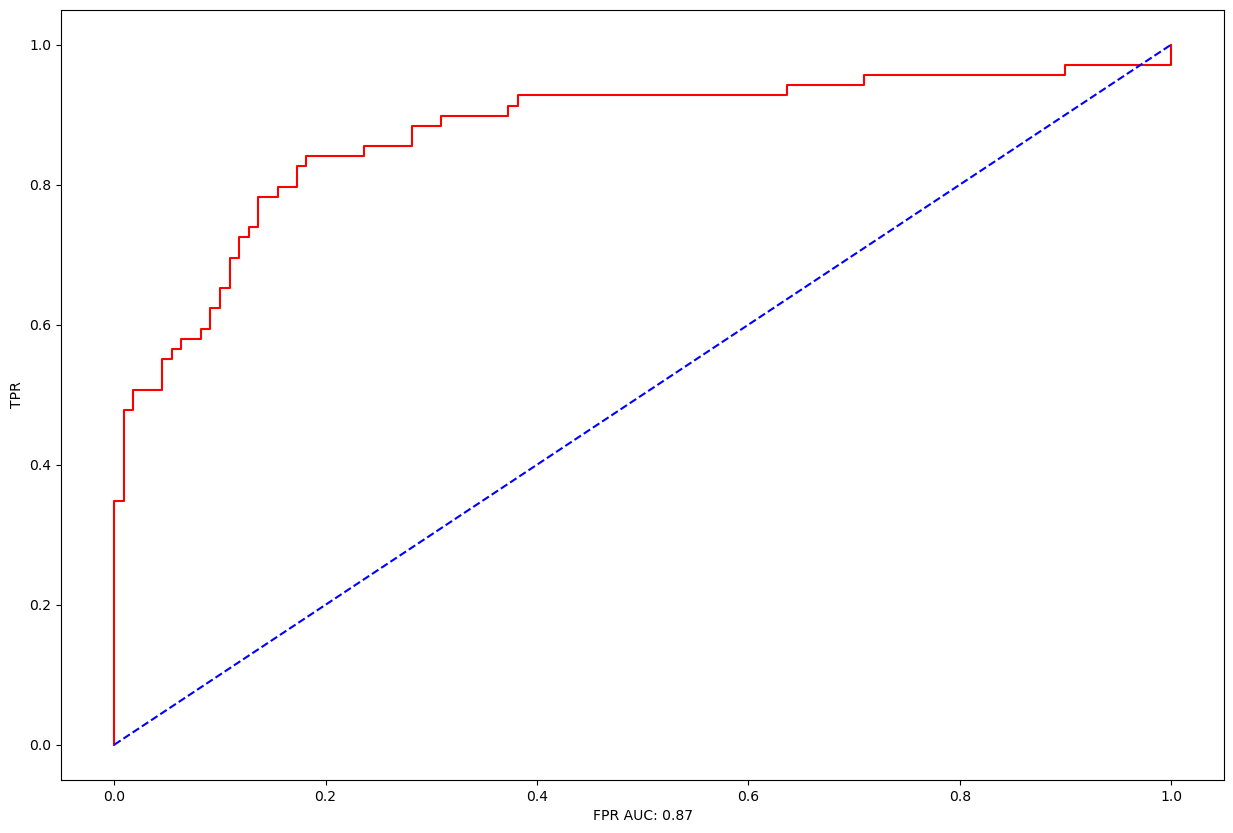

In [136]:
roc(y_test,prediction)

In [137]:
data_thres = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thres':thres,'Youden Index':(tpr-fpr)})
data_thres.sort_values(by='Youden Index', ascending =False)

,FPR,TPR,Thres,Youden Index
32,0.181818,0.840580,0.411247,0.658762
30,0.172727,0.826087,0.436562,0.653360
26,0.136364,0.782609,0.481088,0.646245
31,0.181818,0.826087,0.426589,0.644269
28,0.154545,0.797101,0.466981,0.642556
27,0.154545,0.782609,0.478470,0.628063
29,0.172727,0.797101,0.462282,0.624374
34,0.236364,0.855072,0.309768,0.618709
24,0.127273,0.739130,0.491057,0.611858
22,0.118182,0.724638,0.504470,0.606456


In [138]:
pred_s=[0 if i<0.35 else 1 for i in prediction]

In [139]:
scores(y_test,pred_s)

Precision 0.7073170731707317
Recall 0.7073170731707317
Accuracy 0.8044692737430168
f1_score 0.7682119205298014
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       110
           1       0.71      0.84      0.77        69

    accuracy                           0.80       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.80      0.81       179

Matrix [[86 24]
 [11 58]]
cohen 0.6012855597276141


In [140]:
 from sklearn.linear_model import LogisticRegression

In [141]:
lr=LogisticRegression()

In [142]:
model=lr.fit(x_train,y_train).predict(x_test)

In [143]:
scores(y_test,model)

Precision 0.7903225806451613
Recall 0.7903225806451613
Accuracy 0.8156424581005587
f1_score 0.7480916030534351
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

Matrix [[97 13]
 [20 49]]
cohen 0.6033707110723159


In [144]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [145]:
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [146]:
dtree=DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [147]:
model=dtree.fit(x_train,y_train)

In [148]:
pred=model.predict(x_test)

[Text(0.5, 0.8333333333333334, 'Pclass <= 0.5\nentropy = 0.96\nsamples = 712\nvalue = [439, 273]'),
 Text(0.25, 0.5, 'Sex <= -1.195\nentropy = 0.704\nsamples = 465\nvalue = [376, 89]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.991\nsamples = 36\nvalue = [16, 20]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.636\nsamples = 429\nvalue = [360, 69]'),
 Text(0.75, 0.5, 'const <= 2.5\nentropy = 0.819\nsamples = 247\nvalue = [63, 184]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.33\nsamples = 132\nvalue = [8, 124]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.999\nsamples = 115\nvalue = [55, 60]')]

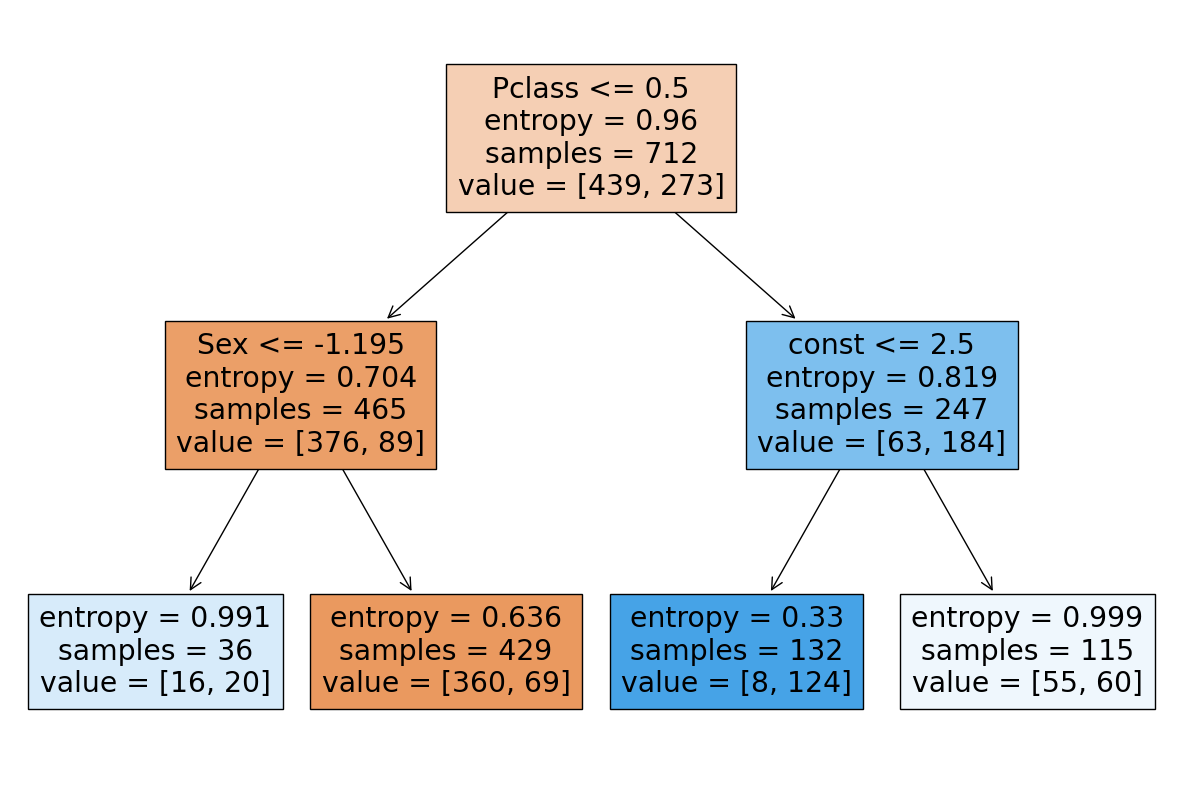

In [149]:
plot_tree(model,feature_names = X_train.columns,filled = True)

In [150]:
scores(y_test, pred)

Precision 0.7222222222222222
Recall 0.7222222222222222
Accuracy 0.7932960893854749
f1_score 0.7375886524822696
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       110
           1       0.72      0.75      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179

Matrix [[90 20]
 [17 52]]
cohen 0.5672090439783048


In [151]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [152]:
from catboost import CatBoostClassifier

In [153]:
cate=CatBoostClassifier(iterations=100,learning_rate=0.05,loss_function='Logloss', boosting_type='Ordered')

In [154]:
model=cate.fit(x_train,y_train)
pred=model.predict(x_test)

0:	learn: 0.6746832	total: 208ms	remaining: 20.6s
1:	learn: 0.6567183	total: 218ms	remaining: 10.7s
2:	learn: 0.6414643	total: 223ms	remaining: 7.22s
3:	learn: 0.6266277	total: 234ms	remaining: 5.62s
4:	learn: 0.6128887	total: 245ms	remaining: 4.66s
5:	learn: 0.5995236	total: 254ms	remaining: 3.97s
6:	learn: 0.5894326	total: 256ms	remaining: 3.4s
7:	learn: 0.5779809	total: 260ms	remaining: 2.99s
8:	learn: 0.5671949	total: 267ms	remaining: 2.7s
9:	learn: 0.5571503	total: 273ms	remaining: 2.46s
10:	learn: 0.5489310	total: 280ms	remaining: 2.26s
11:	learn: 0.5429003	total: 282ms	remaining: 2.07s
12:	learn: 0.5344461	total: 288ms	remaining: 1.93s
13:	learn: 0.5266519	total: 294ms	remaining: 1.81s
14:	learn: 0.5196640	total: 301ms	remaining: 1.7s
15:	learn: 0.5133647	total: 304ms	remaining: 1.59s
16:	learn: 0.5083052	total: 307ms	remaining: 1.5s
17:	learn: 0.5044155	total: 309ms	remaining: 1.41s
18:	learn: 0.4983370	total: 315ms	remaining: 1.34s
19:	learn: 0.4946130	total: 318ms	remaining: 

In [155]:
scores(y_test,pred)

Precision 0.8166666666666667
Recall 0.8166666666666667
Accuracy 0.8268156424581006
f1_score 0.7596899224806202
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.82      0.71      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179

Matrix [[99 11]
 [20 49]]
cohen 0.62534602660185


In [156]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [157]:
rf= RandomForestClassifier(n_estimators=100)

In [158]:
model=rf.fit(x_train,y_train)

In [159]:
pred_rf=model.predict(x_test)

In [160]:
scores(y_test,pred_rf)

Precision 0.8947368421052632
Recall 0.8947368421052632
Accuracy 0.8659217877094972
f1_score 0.8095238095238095
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       110
           1       0.89      0.74      0.81        69

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179

Matrix [[104   6]
 [ 18  51]]
cohen 0.7075163398692811


In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
param={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [163]:
model=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)

In [164]:
model1=model.fit(x_train,y_train)

In [165]:
pred=model1.predict(x_test)

In [166]:
scores(y_test,pred)

Precision 0.7575757575757576
Recall 0.7575757575757576
Accuracy 0.8044692737430168
f1_score 0.7407407407407408
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Matrix [[94 16]
 [19 50]]
cohen 0.5839144583914458


In [167]:
# testset

In [218]:
test=pd.read_csv(r"C:\Users\hp\Downloads\test(3).csv")

In [219]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [220]:
test['Employment']= np.where(test.Fare==0.0,'employee','unemployee')

In [221]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Employment
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,unemployee
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,unemployee
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,unemployee
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,unemployee
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,unemployee
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,unemployee
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,unemployee
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,unemployee
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,unemployee


In [222]:
val=test.groupby("Ticket")["Ticket"].count().to_dict()
val

{'110469': 1,
 '110489': 1,
 '110813': 1,
 '111163': 1,
 '112051': 1,
 '112058': 1,
 '112377': 1,
 '112378': 2,
 '112901': 1,
 '113038': 1,
 '113044': 1,
 '113054': 1,
 '113059': 1,
 '113503': 4,
 '113509': 1,
 '113773': 1,
 '113778': 1,
 '113780': 1,
 '113781': 2,
 '113790': 1,
 '113791': 1,
 '113795': 1,
 '113796': 1,
 '113801': 1,
 '11753': 1,
 '11765': 1,
 '11767': 1,
 '11769': 1,
 '11770': 1,
 '11778': 2,
 '11813': 1,
 '1222': 1,
 '12749': 2,
 '13050': 2,
 '13236': 2,
 '13508': 2,
 '13567': 1,
 '13695': 2,
 '13905': 1,
 '1601': 1,
 '16966': 3,
 '17463': 1,
 '17464': 1,
 '17475': 1,
 '17765': 1,
 '17770': 1,
 '19877': 1,
 '19924': 1,
 '19928': 1,
 '19950': 2,
 '2003': 1,
 '211535': 1,
 '21228': 2,
 '21332': 1,
 '220844': 1,
 '220845': 3,
 '226875': 1,
 '228414': 1,
 '230136': 2,
 '233478': 1,
 '233734': 1,
 '235509': 1,
 '236853': 1,
 '236854': 1,
 '237216': 1,
 '237249': 1,
 '237393': 1,
 '237670': 1,
 '237734': 1,
 '237735': 1,
 '237789': 1,
 '239059': 1,
 '240261': 1,
 '240276':

In [223]:
test ['grp_members']=test['Ticket'].map(val)

In [224]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Employment,grp_members
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,unemployee,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,unemployee,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,unemployee,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,unemployee,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,unemployee,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,unemployee,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,unemployee,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,unemployee,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,unemployee,1


In [225]:
list1=[]
for i in test['Name']:
    a=i.split(', ')[1].split()[0]
    list1.append(a)
print(list1)  

['Mr.', 'Mrs.', 'Mr.', 'Mr.', 'Mrs.', 'Mr.', 'Miss.', 'Mr.', 'Mrs.', 'Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Mr.', 'Mrs.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Mrs.', 'Mr.', 'Master.', 'Mrs.', 'Mr.', 'Mrs.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Mrs.', 'Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Miss.', 'Mr.', 'Master.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Master.', 'Mrs.', 'Miss.', 'Mr.', 'Mr.', 'Mrs.', 'Miss.', 'Mr.', 'Miss.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Mrs.', 'Mr.', 'Miss.', 'Master.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Miss.', 'Ms.', 'Master.', 'Mrs.', 'Mr.', 'Mrs.', 'Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Mr.', 'Miss.', 'Mr.', 'Mrs.', 'Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Miss.', 'Miss.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mrs.', 'Miss.', 'Mr.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Miss.', 'Mr.', 'M

In [226]:
test['title']=list1

In [227]:
for i in['Don.', 'Rev.', 'Dr.','Dona.','Mme.', 'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the','Jonkheer.']:
    test.replace({i:"others"}, inplace=True)
    

In [228]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Employment,grp_members,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,unemployee,1,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,unemployee,1,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,unemployee,1,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,unemployee,1,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,unemployee,1,Mrs.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,unemployee,1,Mr.
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,unemployee,1,others
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,unemployee,1,Mr.
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,unemployee,1,Mr.


In [229]:
test['title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'others'], dtype=object)

In [230]:
age= test.groupby('title')['Age'].mean().to_dict()
age

{'Master.': 7.406470588235294,
 'Miss.': 21.77484375,
 'Mr.': 32.0,
 'Mrs.': 38.903225806451616,
 'others': 43.833333333333336}

In [231]:
test.loc[test.Age.isnull()==True,['Age']]=test['title'].map(age)
test['Age']=np.round(test['Age'],2)

In [232]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Employment,grp_members,title
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q,unemployee,1,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S,unemployee,1,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q,unemployee,1,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S,unemployee,1,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S,unemployee,1,Mrs.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,32.00,0,0,A.5. 3236,8.0500,NaN,S,unemployee,1,Mr.
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.9000,C105,C,unemployee,1,others
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,unemployee,1,Mr.
416,1308,3,"Ware, Mr. Frederick",male,32.00,0,0,359309,8.0500,NaN,S,unemployee,1,Mr.


In [233]:
test.drop(columns= ["PassengerId", "Name",'Ticket','Cabin',], inplace=True)

In [234]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Employment,grp_members,title
0,3,male,34.50,0,0,7.8292,Q,unemployee,1,Mr.
1,3,female,47.00,1,0,7.0000,S,unemployee,1,Mrs.
2,2,male,62.00,0,0,9.6875,Q,unemployee,1,Mr.
3,3,male,27.00,0,0,8.6625,S,unemployee,1,Mr.
4,3,female,22.00,1,1,12.2875,S,unemployee,1,Mrs.
...,...,...,...,...,...,...,...,...,...,...
413,3,male,32.00,0,0,8.0500,S,unemployee,1,Mr.
414,1,female,39.00,0,0,108.9000,C,unemployee,1,others
415,3,male,38.50,0,0,7.2500,S,unemployee,1,Mr.
416,3,male,32.00,0,0,8.0500,S,unemployee,1,Mr.


In [235]:
test.drop(['SibSp', 'Parch','title'], axis=1,inplace=True)

In [236]:
test

,Pclass,Sex,Age,Fare,Embarked,Employment,grp_members
0,3,male,34.50,7.8292,Q,unemployee,1
1,3,female,47.00,7.0000,S,unemployee,1
2,2,male,62.00,9.6875,Q,unemployee,1
3,3,male,27.00,8.6625,S,unemployee,1
4,3,female,22.00,12.2875,S,unemployee,1
...,...,...,...,...,...,...,...
413,3,male,32.00,8.0500,S,unemployee,1
414,1,female,39.00,108.9000,C,unemployee,1
415,3,male,38.50,7.2500,S,unemployee,1
416,3,male,32.00,8.0500,S,unemployee,1


In [237]:
test['Employment']=pd.get_dummies(test['Employment'], drop_first=True)

In [238]:
test

,Pclass,Sex,Age,Fare,Embarked,Employment,grp_members
0,3,male,34.50,7.8292,Q,1,1
1,3,female,47.00,7.0000,S,1,1
2,2,male,62.00,9.6875,Q,1,1
3,3,male,27.00,8.6625,S,1,1
4,3,female,22.00,12.2875,S,1,1
...,...,...,...,...,...,...,...
413,3,male,32.00,8.0500,S,1,1
414,1,female,39.00,108.9000,C,1,1
415,3,male,38.50,7.2500,S,1,1
416,3,male,32.00,8.0500,S,1,1


In [209]:
test['Age'].isnull().sum()

0

In [239]:
dummy2=pd.get_dummies(test,columns=['Embarked'], drop_first=True)

In [191]:
dummy2

,Pclass,Sex,Age,Fare,Employment,grp_members,Embarked_Q,Embarked_S
0,3,male,34.50,7.8292,1,1,1,0
1,3,female,47.00,7.0000,1,1,0,1
2,2,male,62.00,9.6875,1,1,1,0
3,3,male,27.00,8.6625,1,1,0,1
4,3,female,22.00,12.2875,1,1,0,1
...,...,...,...,...,...,...,...,...
413,3,male,32.00,8.0500,1,1,0,1
414,1,female,39.00,108.9000,1,1,0,0
415,3,male,38.50,7.2500,1,1,0,1
416,3,male,32.00,8.0500,1,1,0,1


In [240]:
dummy2.loc[dummy2['Sex']=='male','Sex']=0
dummy2.loc[dummy2['Sex']=='female','Sex']=1 # male is labelled as 0  and female is labelled as 1

In [241]:
dummy2

,Pclass,Sex,Age,Fare,Employment,grp_members,Embarked_Q,Embarked_S
0,3,0,34.50,7.8292,1,1,1,0
1,3,1,47.00,7.0000,1,1,0,1
2,2,0,62.00,9.6875,1,1,1,0
3,3,0,27.00,8.6625,1,1,0,1
4,3,1,22.00,12.2875,1,1,0,1
...,...,...,...,...,...,...,...,...
413,3,0,32.00,8.0500,1,1,0,1
414,1,1,39.00,108.9000,1,1,0,0
415,3,0,38.50,7.2500,1,1,0,1
416,3,0,32.00,8.0500,1,1,0,1


In [242]:
dummy2.loc[:,['Age', 'Fare']]=sc.transform(pd.DataFrame(dummy2.loc[:,['Age', 'Fare']]))

In [243]:
dummy2

,Pclass,Sex,Age,Fare,Employment,grp_members,Embarked_Q,Embarked_S
0,3,0,2.079205,7.368679,1,1,1,0
1,3,1,3.758172,6.213955,1,1,0,1
2,2,0,5.772933,9.956503,1,1,1,0
3,3,0,1.071825,8.529113,1,1,0,1
4,3,1,0.400239,13.577202,1,1,0,1
...,...,...,...,...,...,...,...,...
413,3,0,1.743412,7.676160,1,1,0,1
414,1,1,2.683634,148.117476,1,1,0,0
415,3,0,2.616475,6.562099,1,1,0,1
416,3,0,1.743412,7.676160,1,1,0,1


In [197]:
np.isnan(x.any()) #and gets False
np.isfinite(x.all()) #and gets True

Pclass           True
Sex              True
Age              True
Fare             True
Employment       True
group_members    True
Embarked_Q       True
Embarked_S       True
dtype: bool

In [244]:
np.isnan(x.any())

Pclass           False
Sex              False
Age              False
Fare             False
Employment       False
group_members    False
Embarked_Q       False
Embarked_S       False
dtype: bool

In [198]:
np.all(np.isfinite(x))

True

In [199]:
dummy2

,Pclass,Sex,Age,Fare,Employment,grp_members,Embarked_Q,Embarked_S
0,3,0,2.079205,7.368679,1,1,1,0
1,3,1,3.758172,6.213955,1,1,0,1
2,2,0,5.772933,9.956503,1,1,1,0
3,3,0,1.071825,8.529113,1,1,0,1
4,3,1,0.400239,13.577202,1,1,0,1
...,...,...,...,...,...,...,...,...
413,3,0,1.743412,7.676160,1,1,0,1
414,1,1,2.683634,148.117476,1,1,0,0
415,3,0,2.616475,6.562099,1,1,0,1
416,3,0,1.743412,7.676160,1,1,0,1


In [200]:
x['Age']=round(x['Age'],6)
x['Fare']=round(x['Fare'],6)

In [201]:
for i in x['Age']:
    print(type(i))

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

In [202]:
x

,Pclass,Sex,Age,Fare,Employment,group_members,Embarked_Q,Embarked_S
0,3,0,-0.547553,-0.878820,1,1,0,1
1,1,1,0.639794,1.336651,1,1,0,0
2,3,1,-0.240076,-0.790065,1,1,0,1
3,1,1,0.424883,1.067352,1,2,0,1
4,3,0,0.424883,-0.774439,1,1,0,1
...,...,...,...,...,...,...,...,...
886,2,0,-0.164482,-0.294907,1,1,0,1
887,1,1,-0.784261,0.527906,1,1,0,1
888,3,1,-0.565502,0.288885,1,2,0,1
889,1,0,-0.240076,0.527906,1,1,0,0


In [203]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [204]:
X

NameError: name 'X' is not defined

In [ ]:
np.where(np.isnan(x))

In [ ]:
x = x.astype(float)

In [ ]:
x

In [ ]:

x.replace({np.inf: -1_000_000, np.inf: 1_000_000}, inplace=True)

In [ ]:
x

In [ ]:
x = x.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [208]:
x['Age'].isnull().sum()

0

In [260]:
from sys import getsizeof
for i in x['Fare']:
    print(getsizeof(i))

24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
2

In [210]:
model=rf.fit(x,y)

In [257]:
x['Fare'][0]

TypeError: 'int' object is not callable

In [253]:
x['Employment']

0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    1
890    1
Name: Employment, Length: 891, dtype: int32

In [266]:
model.predict(dummy2)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [271]:
dummy

,Survived,Pclass,Sex,Age,Fare,title,Age_grp,Employment,group_members,Embarked_Q,Embarked_S
0,0,3,0,-0.547553,-0.878820,0.580247,0.625140,1,1,0,1
1,1,1,1,0.639794,1.336651,0.140292,0.625140,1,1,0,0
2,1,3,1,-0.240076,-0.790065,0.204265,0.625140,1,1,0,1
3,1,1,1,0.424883,1.067352,0.140292,0.625140,1,2,0,1
4,0,3,0,0.424883,-0.774439,0.580247,0.625140,1,1,0,1
5,0,3,0,0.233910,-0.725002,0.580247,0.625140,1,1,1,0
6,0,1,0,1.743000,1.045516,0.580247,0.144781,1,1,0,1
7,0,3,0,-2.314319,0.184264,0.044893,0.205387,1,4,0,1
8,1,3,1,-0.164482,-0.449944,0.140292,0.625140,1,3,0,1
9,1,2,1,-1.193332,0.530176,0.140292,0.205387,1,2,0,0


In [270]:
pd.set_option('display.max_rows',None)
x['Age']

0     -0.547553
1      0.639794
2     -0.240076
3      0.424883
4      0.424883
5      0.233910
6      1.743000
7     -2.314319
8     -0.164482
9     -1.193332
10    -2.102641
11     2.009472
12    -0.704715
13     0.710785
14    -1.193332
15     1.809924
16    -2.314319
17     0.233910
18     0.133404
19     0.489671
20     0.424883
21     0.352564
22    -1.109832
23    -0.089356
24    -1.718186
25     0.639794
26     0.233910
27    -0.784261
28    -0.565502
29     0.233910
30     0.781469
31     0.489671
32    -0.565502
33     2.533295
34    -0.089356
35     0.921950
36     0.233910
37    -0.625824
38    -0.864499
39    -1.193332
40     0.781469
41    -0.164482
42     0.233910
43    -2.206159
44    -0.784261
45     0.233910
46     0.233910
47    -0.565502
48     0.233910
49    -0.864499
50    -1.810864
51    -0.625824
52     1.405112
53    -0.014677
54     2.468437
55     0.233910
56    -0.625824
57    -0.051962
58    -2.002679
59    -1.450004
60    -0.547553
61     0.639794
62     1

In [269]:
pd.set_option('display.max_rows',None)
x['Fare']

0     -0.878820
1      1.336651
2     -0.790065
3      1.067352
4     -0.774439
5     -0.725002
6      1.045516
7      0.184264
8     -0.449944
9      0.530176
10    -0.045488
11     0.409788
12    -0.774439
13     0.567946
14    -0.799022
15    -0.087999
16     0.499367
17    -0.294907
18     0.028774
19    -0.882259
20     0.389462
21    -0.294907
22    -0.777023
23     0.689183
24     0.184264
25     0.571395
26    -0.882259
27     2.451466
28    -0.795850
29    -0.793750
30     0.451609
31     1.968026
32    -0.812349
33    -0.508582
34     1.464330
35     1.047969
36    -0.881680
37    -0.774439
38     0.028774
39    -0.440244
40    -0.611436
41     0.180762
42    -0.793750
43     0.838962
44    -0.795850
45    -0.774439
46    -0.119558
47    -0.812349
48     0.212012
49     0.017719
50     0.795012
51    -0.805933
52     1.402972
53     0.389462
54     1.209543
55     0.689183
56    -0.508582
57    -0.881680
58     0.452628
59     0.951933
60    -0.881680
61     1.440396
62     1